Compare similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import pandas as pd

In [ ]:
def read_csv(file_path):
    return pd.read_csv(file_path)

In [ ]:
def calculate_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    return similarity[0][0]

In [ ]:
def compare_abstracts(file_path):
    df = read_csv(file_path)
    similarities = {}

    for index, row in df.iterrows():
        human_abstract = row['Human_abstract']
        gpt_abstract = row['GPT_abstract']
        article_id = row['Name']

        similarity = calculate_similarity(human_abstract, gpt_abstract)
        similarities[article_id] = similarity

    return similarities

In [ ]:
similarities = compare_abstracts('/content/Abstract - Sheet1.csv')
print(similarities)

{'12-851': 0.8597643488161311, '12-322': 0.90103291033026, '12-3': 0.8908986905264696, '11-1227': 0.8432779320771173, '11-1145': 0.8670815232011168, '11-725': 0.7894288936035392, '11-524': 0.7538621399491846, '11-289': 0.6055534211916487, '11-148': 0.8361999087495957, '11-24': 0.7515423994236219, '10-946': 0.6511091795890789, '10-266': 0.6316439965805808, '9-1102': 0.8229184721176045, '9-759': 0.7241710810723979, '8-1441': 0.8367872714472337}


In [ ]:
def add_similarity_column(file_path):
    df = read_csv(file_path)

    # Calculate similarity and add it as a new column
    df['Similarity'] = df.apply(lambda row: calculate_similarity(row['Human_abstract'], row['GPT_abstract']), axis=1)

    # Define the output file path
    output_file_path = 'New_' + file_path.split('/')[-1]
    df.to_csv(output_file_path, index=False)
    return output_file_path

original_file_path = '/content/Abstract - Sheet1.csv'

# Adding similarity column and saving the new CSV
new_csv_file_path = add_similarity_column(original_file_path)
new_csv_file_path

'New_Abstract - Sheet1.csv'

In [ ]:
df = pd.DataFrame(list(similarities.items()), columns=['Article_id', 'similarities'])
df

,Article_id,similarities
0,12-851,0.859764
1,12-322,0.901033
2,12-3,0.890899
3,11-1227,0.843278
4,11-1145,0.867082
5,11-725,0.789429
6,11-524,0.753862
7,11-289,0.605553
8,11-148,0.836200
9,11-24,0.751542


In [ ]:
df.to_csv('similarities_2.csv')

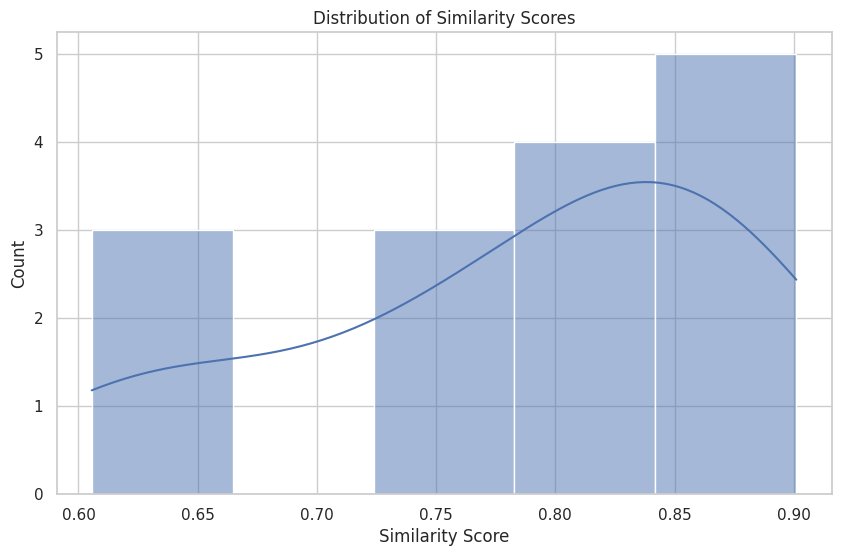

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram to visualize the distribution of similarity scores
plt.figure(figsize=(10, 6))
sns.histplot(df['similarities'], kde=True)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the average similarity
average_similarity = df['similarities'].mean()
average_similarity

0.7843514779117055

In [ ]:
# Calculate the median similarity
median_similarity = df['similarities'].median()
median_similarity

0.8229184721176045

In [ ]:
# Calculate the quartiles for similarity
quartiles = df['similarities'].quantile([0.25, 0.50, 0.75])
quartiles

0.25    0.737857
0.50    0.822918
0.75    0.851521
Name: similarities, dtype: float64